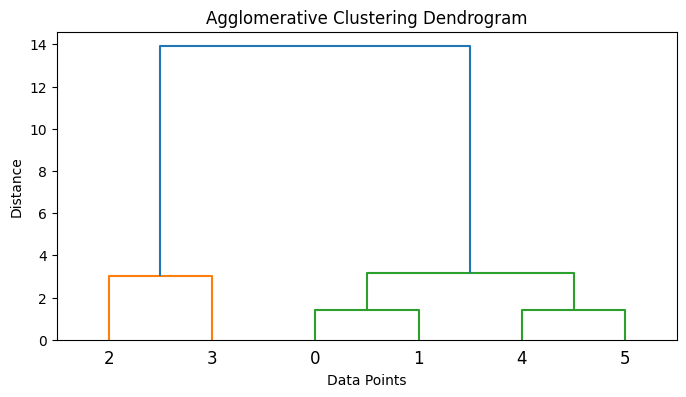

Cluster assignments: [2 2 1 1 2 2]


In [ ]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

# Samples data
data = np.array([[1, 2], [2, 3], [5, 8], [8, 8], [1, 0], [0, 1]])

# Applies agglomerative clustering using Ward's method
Z = linkage(data, method='ward')

# Plots dendrogram
plt.figure(figsize=(8, 4))
dendrogram(Z)
plt.title('Agglomerative Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Extracts clusters (e.g., form 2 clusters)
clusters = fcluster(Z, t=2, criterion='maxclust')
print("Cluster assignments:", clusters)

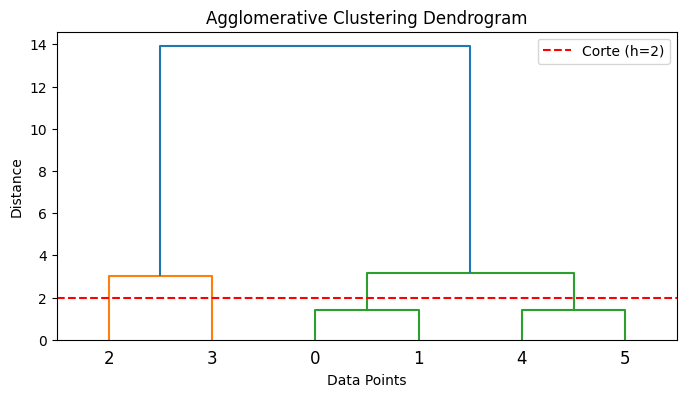

Cluster assignments: [2 2 1 1 2 2]


In [ ]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Samples data
data = np.array([[1, 2], [2, 3], [5, 8], [8, 8], [1, 0], [0, 1]])

# Applies agglomerative clustering using Ward's method
Z = linkage(data, method='ward')

# Plots dendrogram
plt.figure(figsize=(8, 4))
dendrogram(Z)
plt.title('Agglomerative Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')

# Punto de Corte
h = 2  # Ajuste este valor según su necesidad
plt.axhline(y=h, color='r', linestyle='--', label=f'Corte (h={h})')

plt.legend()
plt.show()

# Extracts clusters (e.g., form 2 clusters)
clusters = fcluster(Z, t=2, criterion='maxclust')
print("Cluster assignments:", clusters)

# **Criterios de vinculación**

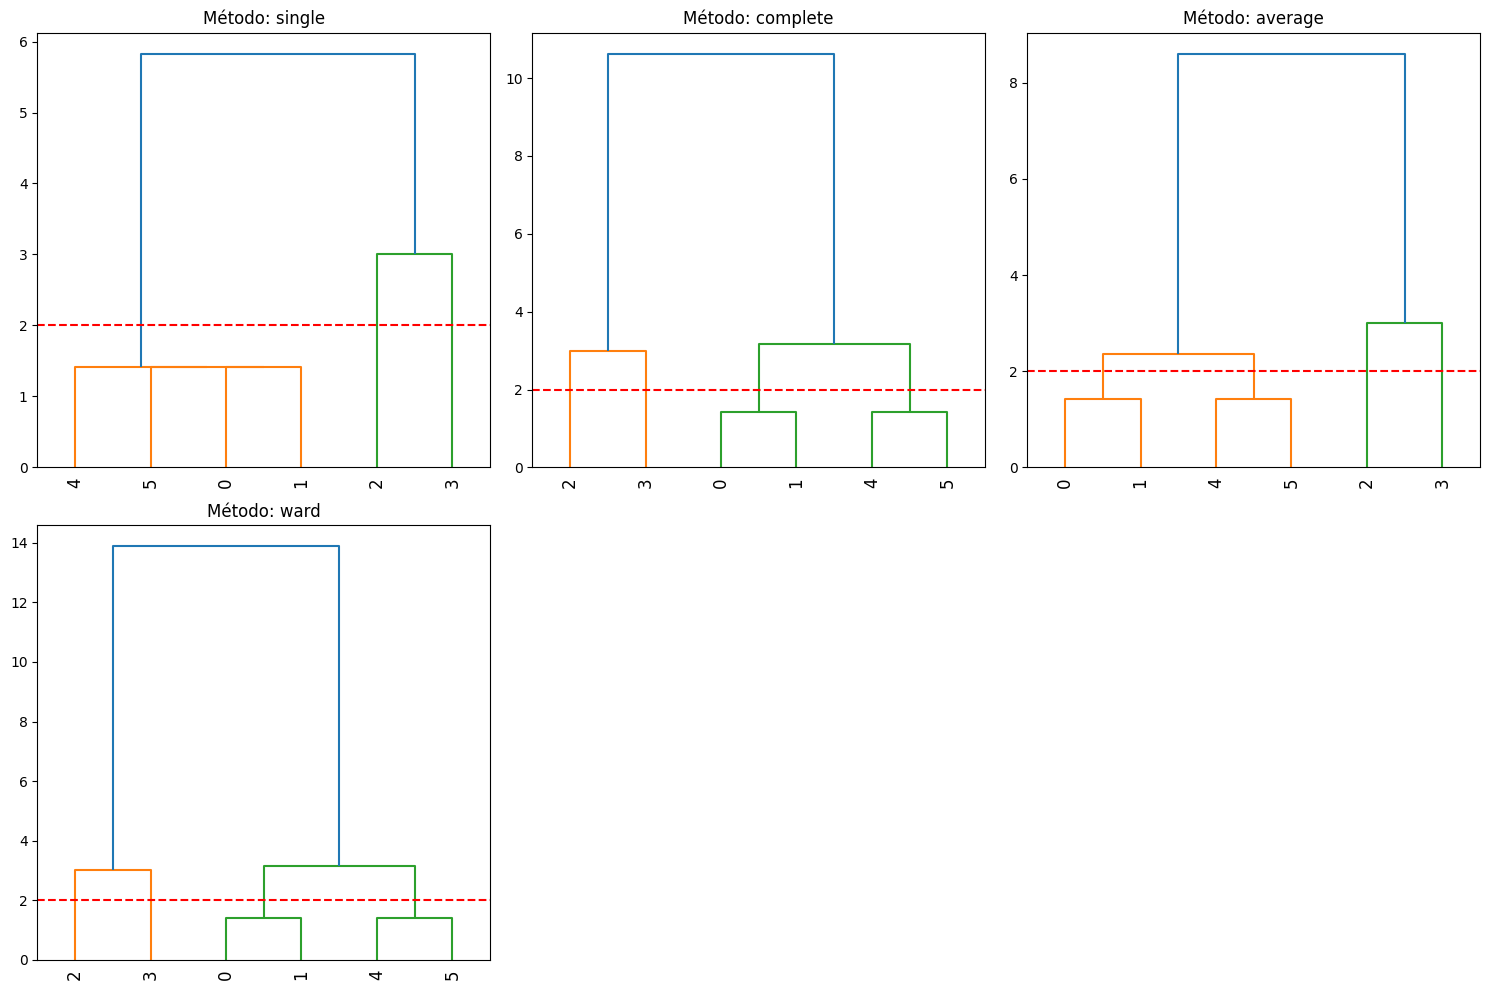

In [25]:
# Métodos a comparar
methods = ['single', 'complete', 'average', 'ward']

# Visualización
plt.figure(figsize=(15, 10))
for i, method in enumerate(methods, 1):
    Z = linkage(data, method=method)
    plt.subplot(2, 3, i)
    dendrogram(Z, labels=np.arange(len(data)), leaf_rotation=90)
    plt.title(f'Método: {method}', fontsize=12)
    plt.axhline(y=2, color='r', linestyle='--')

plt.tight_layout()
plt.show()

In [10]:
from scipy.spatial.distance import pdist, squareform
#data = np.array([[1, 2], [2, 3], [5, 8]])
distance_matrix = squareform(pdist(data, metric='euclidean'))
single_linkage_min = np.min(distance_matrix[0, 1:])
print("Single Linkage Distance between Cluster A (point 1) and Cluster B (point 2, 3):", single_linkage_min)

Single Linkage Distance between Cluster A (point 1) and Cluster B (point 2, 3): 1.4142135623730951


In [11]:
single_linkage_max = np.max(distance_matrix[0, 1:])
print("Complete Linkage Distance between Cluster A and B:", single_linkage_max)

Complete Linkage Distance between Cluster A and B: 9.219544457292887


In [12]:
average_linkage = np.mean(distance_matrix[0, 1:])
print("Average Linkage Distance between Cluster A and B:", average_linkage)

Average Linkage Distance between Cluster A and B: 4.251814826593411


In [13]:
from scipy.cluster.hierarchy import linkage
linkage_ward = linkage(data, method='ward')
print("Ward's Linkage Matrix:\n", linkage_ward)

Ward's Linkage Matrix:
 [[ 0.          1.          1.41421356  2.        ]
 [ 4.          5.          1.41421356  2.        ]
 [ 2.          3.          3.          2.        ]
 [ 6.          7.          3.16227766  4.        ]
 [ 8.          9.         13.90443574  6.        ]]


# Métricas de Distancias

In [15]:
Z = linkage(pdist(data, metric='euclidean'), method='single')
Z

array([[0.        , 1.        , 1.41421356, 2.        ],
       [5.        , 6.        , 1.41421356, 3.        ],
       [4.        , 7.        , 1.41421356, 4.        ],
       [2.        , 3.        , 3.        , 2.        ],
       [8.        , 9.        , 5.83095189, 6.        ]])

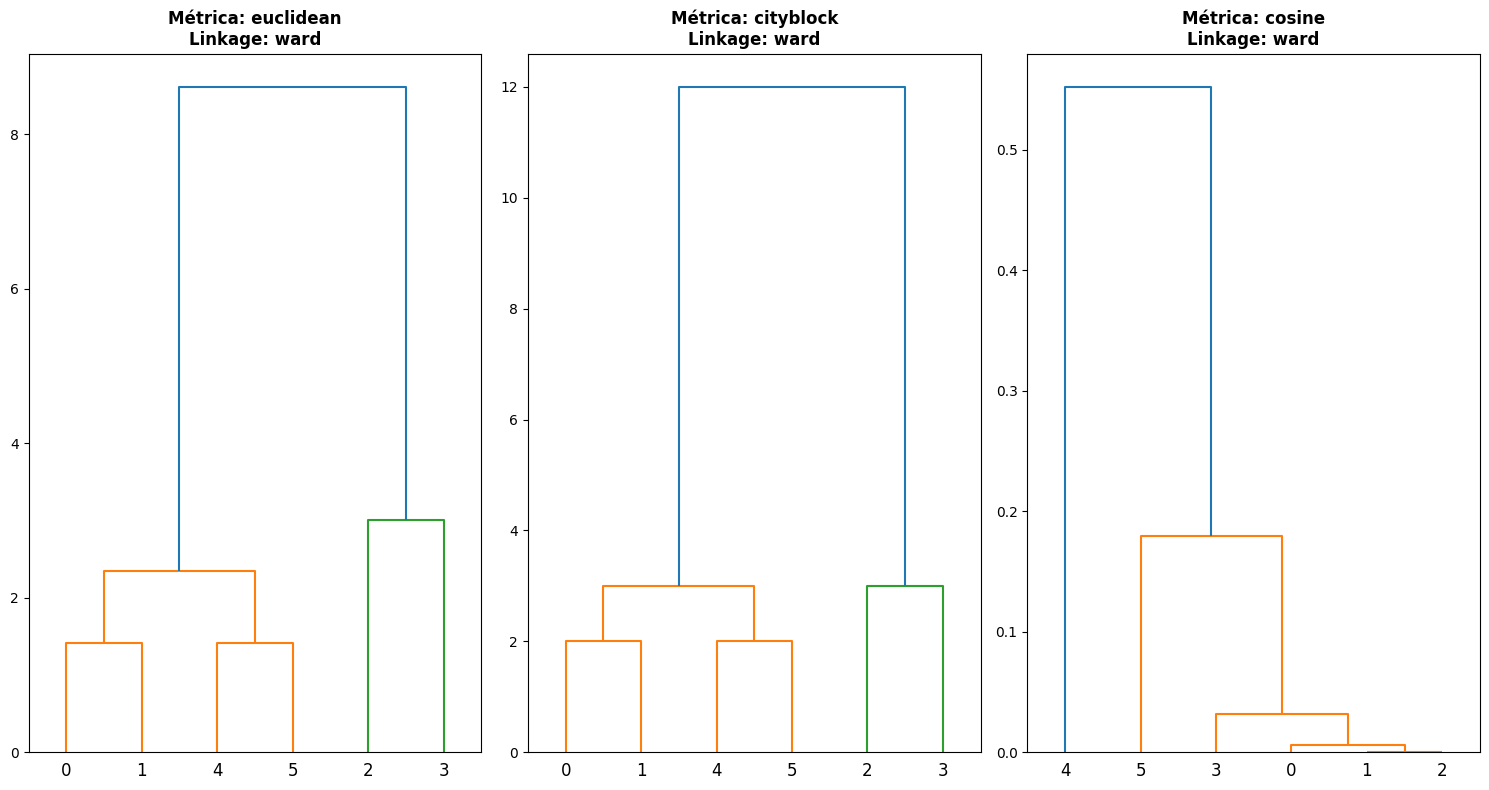

In [50]:
plt.figure(figsize=(15, 8))
for i, metric in enumerate(['euclidean', 'cityblock', 'cosine'], 1):
    Z = linkage(pdist(data, metric=metric), method='average')  # 'average'
    plt.subplot(1, 3, i)
    dendrogram(Z, labels=np.arange(len(data)))
    plt.title(f"Métrica: {metric}\nLinkage: {method}", fontweight='bold')

plt.tight_layout()
plt.show()

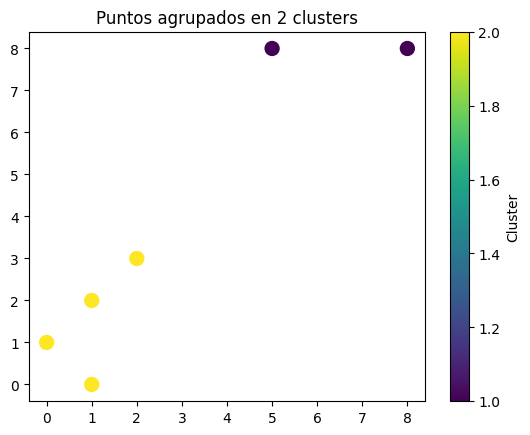

In [16]:
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', s=100)
plt.colorbar(label='Cluster')
plt.title(f"Puntos agrupados en {max(clusters)} clusters")
plt.show()

[1 1 2 2 1 1]


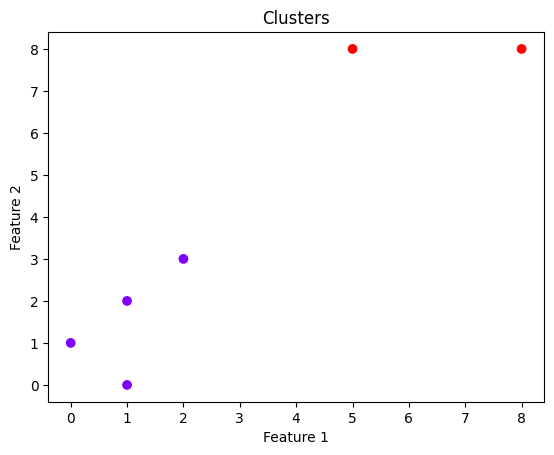

In [17]:
clusters = fcluster(Z, t=2, criterion='maxclust')
print(clusters)

plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='rainbow')
plt.title('Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

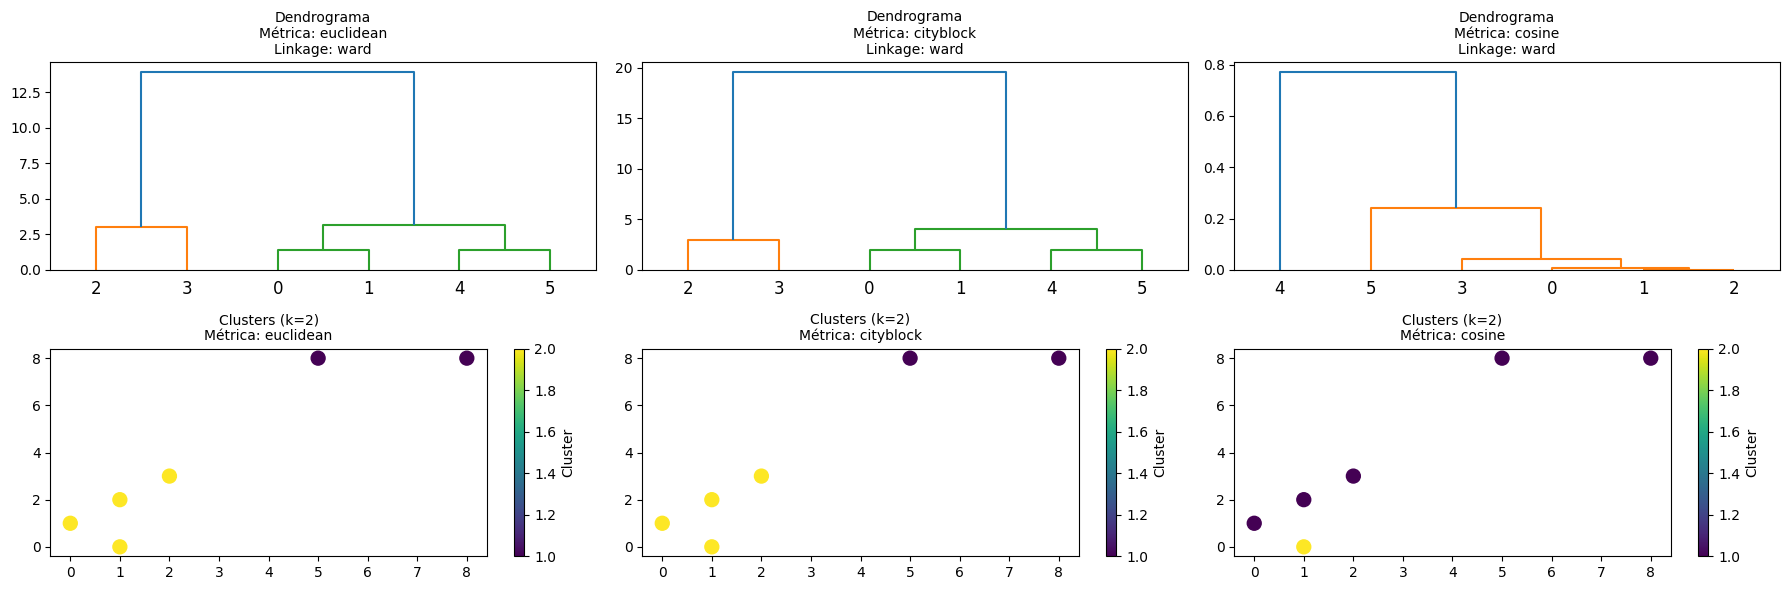

In [21]:
metrics = ['euclidean', 'cityblock', 'cosine']
method = 'ward'

plt.figure(figsize=(18, 6))

for i, metric in enumerate(metrics, 1):
    # --- Calcule linkage and clusters ---
    Z = linkage(pdist(data, metric=metric), method=method)
    clusters = fcluster(Z, t=2, criterion='maxclust')

    # --- Subplot izquierdo: Dendrograma ---
    plt.subplot(2, 3, i)  # 2 filas, 3 columnas (primera fila: dendrogramas)
    dendrogram(Z, labels=np.arange(len(data)), orientation='top')
    plt.title(f"Dendrograma\nMétrica: {metric}\nLinkage: {method}", fontsize=10)

    # --- Subplot derecho: Gráfica de dispersión ---
    plt.subplot(2, 3, i + 3)  # Segunda fila: scatter plots
    plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', s=100)
    plt.colorbar(label='Cluster')
    plt.title(f"Clusters (k={max(clusters)})\nMétrica: {metric}", fontsize=10)

plt.tight_layout()
plt.show()

# Metodo para seleccionar clusters
# Metodo de la Silueta

k=2: Silhouette Score = 0.7194
k=3: Silhouette Score = 0.4454
k=4: Silhouette Score = 0.2475
k=5: Silhouette Score = 0.2475


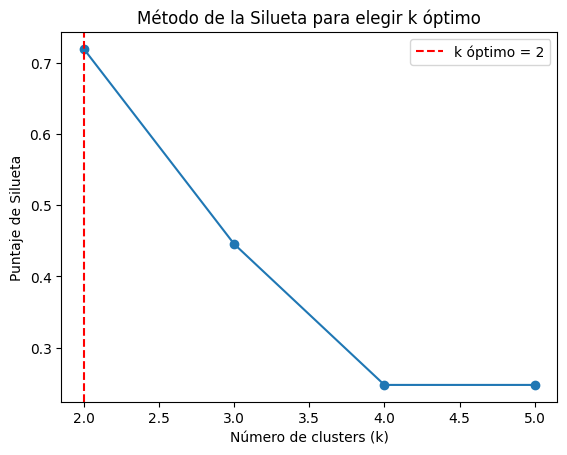

In [ ]:
from sklearn.metrics import silhouette_score

Z = linkage(data, method='ward')

silhouette_scores = []
for k in range(2, len(data)):
    clusters = fcluster(Z, t=k, criterion='maxclust')
    score = silhouette_score(data, clusters)
    silhouette_scores.append(score)
    print(f"k={k}: Silhouette Score = {score:.4f}")

k_optimo = np.argmax(silhouette_scores) + 2

plt.plot(range(2, len(data)), silhouette_scores, marker='o')
plt.axvline(x=k_optimo, color='r', linestyle='--', label=f'k óptimo = {k_optimo}')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Puntaje de Silueta")
plt.title("Método de la Silueta para elegir k óptimo")
plt.legend()
plt.show()

**Interpretación de resultados**
1.   Puntaje alto (> 0.5): Clusters bien definidos.
2.   Puntaje bajo (< 0.3): Los clusters pueden estar solapados.
3. Puntaje negativo: Algunos puntos están mal asignados.

# Metodo del Codo

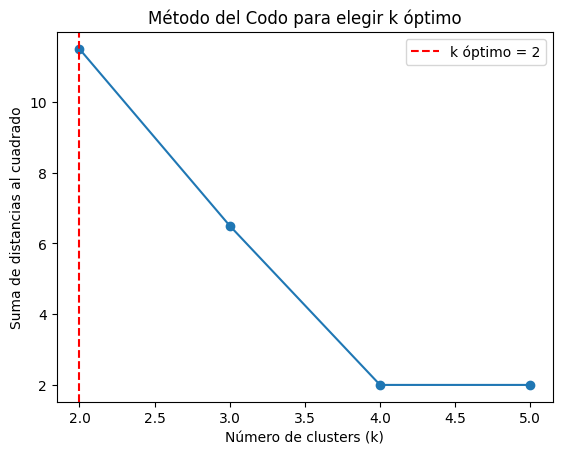

In [8]:
Z = linkage(data, method='ward')

# Calcula la suma de las distancias al cuadrado
distancias = []
for k in range(2, len(data)):
    clusters = fcluster(Z, t=k, criterion='maxclust')
    suma_distancias = 0
    for i in np.unique(clusters):
        puntos_cluster = data[clusters == i]
        centroide = np.mean(puntos_cluster, axis=0)
        suma_distancias += np.sum(np.linalg.norm(puntos_cluster - centroide, axis=1)**2)
    distancias.append(suma_distancias)

# Grafica la suma de las distancias en función de k
plt.plot(range(2, len(data)), distancias, marker='o')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Suma de distancias al cuadrado")
plt.title("Método del Codo para elegir k óptimo")

# Encuentra el punto de inflexión (codo)
k_optimo = np.argmin(np.gradient(distancias)) + 2
plt.axvline(x=k_optimo, color='r', linestyle='--', label=f'k óptimo = {k_optimo}')

plt.legend()
plt.show()